In [1]:
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:,}'.format
from pandas.plotting import autocorrelation_plot
from math import sqrt
import researchpy as rp
import scipy as sp
from scipy import stats
import scipy.signal
from scipy.signal import fftconvolve, convolve
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact
import random as ran
from pprint import pprint

from datetime import datetime
from datetime import timedelta
from dateutil.relativedelta import *

from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV, LogisticRegression
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer, ENGLISH_STOP_WORDS
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC, SVR, LinearSVC, LinearSVR
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.pipeline import make_pipeline
from sklearn import metrics
from sklearn import datasets
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
#from textacy.preprocess import preprocess_text

from gensim import corpora, models, matutils
from collections import defaultdict, Counter

import statsmodels.api as sm
import statsmodels.formula.api as sm
from statsmodels.tsa.stattools import acf, pacf, adfuller
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

import tensorflow as tf

import patsy
from itertools import combinations

from imblearn.over_sampling import SMOTE

import graphviz
import json
import requests
import urllib
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from time import sleep
import re
import twitter

In [2]:
%matplotlib inline
#plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Data Science Case Study

#### Background:
We are constantly evaluating our data to see how it can be clinically informative. We would like to see examples of your data inspection, analyses, and modelling choices on the provided data. The data deliberately has no context.

#### The assignment:
The assignment is to investigate and analyze the attached data (DScasestudy.txt.gz), producing a model that can be used to predict the “response”.
The first column of the provided data is the binary variable “response”. The 16,562 other columns are binary columns that can be used to predict the “response”.

#### Deliverables:
1. A write up of what you did and why.
2. The code you used to perform the work. Feel free to make the write up and code into a single document.
3. A description of the predictive model, with a discussion of how well the model performs.

#### Expectations:
There is no such thing as a perfect model, only what can be done in a certain amount of time. We value your thinking around the problem as well as how the model performs.

### Write Up:
The data provided contains 530 rows and 16,563 binary columns (1 dependent variable (response), 16,562 independent variables (V1-V16562).

After further examination of the data, there were no missing values.

The “response” variable has a positive probability (response=1) of 0.232.  The classes are not imbalanced.

As the “response” measurement is a binary variable, I considered a number of different classification models/algorithms that will predict the “response”.  The models that I chose for classification were logistic regression, random forests, and support vector machines (SVM).

In order to predict model out-of-sample accuracy, the data will be split into training and testing datasets using a 70/30 split to evaluate model performance.

I computed the baseline accuracy to be 0.78 where the most frequent class in the training dataset was response=0.  We will compare our results of the classification models to see if our testing accuracy classification scores are greater than baseline.

In order to optimize each of the models through hyperparameter tuning and attempt to account for overfitting (Testing accuracy < Training accuracy), I used a grid-search of specified hyperparameters and implemented K-folds cross validation with K=10.  The best parameter setting and the best mean cross-validated score was found by grid search for each of the models.  These best parameters were then used in each model to predict the classification accuracy. 

Results:

Logistic Regression:<br>
Training accuracy score: 0.8787<br>
Testing accuracy score : 0.8994<br>
Testing accuracy > Training accuracy<br>
-> Not overfitting

Random Forest:<br>
Training accuracy score: 0.84636<br>
Testing accuracy score : 0.81132<br>
Testing accuracy < Training accuracy<br>
-> Overfitting!

SVC:<br>
Training accuracy score: 1.0<br>
Testing accuracy score : 0.8805<br>
Testing accuracy < Training accuracy<br>
-> Overfitting!

While the testing accuracy scores are all greater than the baseline accuracy of 0.78, only the logistic regression model performance did not result in overfitting. The logistic regression model will be our model of choice for this case study.

Please see the code below.

### Reading a File

In [3]:
# Create data path variable for loading data
data_path = '/Users/yangweichle/Documents/Employment/JOB APPLICATIONS/BAY AREA/DATA SCIENTIST/Tempus_Data & Machine Learning Scientist/'

In [4]:
# Read file into DataFrame
# Note: sep: delimiter to use
case_study = pd.read_table(data_path + 'DScasestudy.txt', sep='\t') # Tab-separated values file

### Examine the DataFrame

In [5]:
# Return the number of rows and columns (dimensionality) of the DataFrame
print('Rows: {}, Cols: {}'.format(case_study.shape[0], case_study.shape[1]))

Rows: 530, Cols: 16563


In [6]:
# Print a concise summary of a DataFrame including the index dtype and column dtypes, non-null values, and memory usage
# Note: Useful to quickly see if null values exist 
case_study.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 16563 columns):
response    int64
V1          int64
V2          int64
V3          int64
V4          int64
V5          int64
V6          int64
V7          int64
V8          int64
V9          int64
V10         int64
V11         int64
V12         int64
V13         int64
V14         int64
V15         int64
V16         int64
V17         int64
V18         int64
V19         int64
V20         int64
V21         int64
V22         int64
V23         int64
V24         int64
V25         int64
V26         int64
V27         int64
V28         int64
V29         int64
V30         int64
V31         int64
V32         int64
V33         int64
V34         int64
V35         int64
V36         int64
V37         int64
V38         int64
V39         int64
V40         int64
V41         int64
V42         int64
V43         int64
V44         int64
V45         int64
V46         int64
V47         int64
V48         int64
V49       

In [7]:
# Column names (which is "an index")
case_study.columns

Index(['response', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
       ...
       'V16553', 'V16554', 'V16555', 'V16556', 'V16557', 'V16558', 'V16559',
       'V16560', 'V16561', 'V16562'],
      dtype='object', length=16563)

In [8]:
# Print the first 5 rows and the last 5 rows of the DataFrame
case_study.head().append(case_study.tail())

,response,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V16553,V16554,V16555,V16556,V16557,V16558,V16559,V16560,V16561,V16562
0,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
525,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
526,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
527,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
528,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
529,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0


### Examine Missing Values

In [9]:
# Count the missing values in each column of a DataFrame - sum() works because True is 1 and False is 0
null_counts = case_study.isnull().sum()
null_counts[null_counts > 0]

Series([], dtype: int64)

In [10]:
null_counts

response    0
V1          0
V2          0
V3          0
V4          0
           ..
V16558      0
V16559      0
V16560      0
V16561      0
V16562      0
Length: 16563, dtype: int64

Note: There are no missing values.

In [11]:
# Create a vertical bar plot by number of missing values per column using matplotlib
# Note: figsize: a tuple (width, height) in inches
#case_study.isnull().sum().plot.bar(figsize=(10, 8));
#plt.title('Number of null values per column');

### Examine the Columns

In [12]:
# Categorical column frequency
# Returns counts of unique values in descending order (first element is the most frequently-occurring element)
# Note: Excludes NA values by default
print(case_study.response.value_counts(dropna=False))
round(case_study.response.value_counts(dropna=False) / len(case_study), 3)

0    407
1    123
Name: response, dtype: int64


0   0.768
1   0.232
Name: response, dtype: float64

Note: There are too many independent variables to examine individually.

In [13]:
print(case_study.V1.value_counts(dropna=False))
round(case_study.V1.value_counts(dropna=False) / len(case_study), 3)

0    525
1      5
Name: V1, dtype: int64


0   0.991
1   0.009
Name: V1, dtype: float64

In [14]:
print(case_study.V16562.value_counts(dropna=False))
round(case_study.V16562.value_counts(dropna=False) / len(case_study), 3)

0    293
1    237
Name: V16562, dtype: int64


0   0.553
1   0.447
Name: V16562, dtype: float64

### Summarize the DataFrame

Note: There are too many independent variables to examine individually.

In [15]:
# Describe numeric columns
# Generates descriptive summary statistics of the central tendency, dispersion, and shape of the distribution
# Note: By default only numeric (int64) fields are returned
#       Excludes "NaN" (missing) values
# Note: axis=0 for rows, 1 for columns
round(case_study[['response']].describe(), 3)

,response
count,530.0
mean,0.232
std,0.423
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,1.0


### Data Modeling

#### Predicting Response

In [16]:
# Categorical column frequency
# Returns counts of unique values in descending order (first element is the most frequently-occurring element)
# Note: Excludes NA values by default
print(case_study.response.value_counts(dropna=False))
print()
print('Percentage of Response=0, Response=1')
round(case_study.response.value_counts(dropna=False)/len(case_study), 3)

0    407
1    123
Name: response, dtype: int64

Percentage of Response=0, Response=1


0   0.768
1   0.232
Name: response, dtype: float64

Note: CLASSES ARE NOT IMBALANCED!!

### Using Logistic Regression for Classification

Logistic regression: Log odds of a categorical response being "true" (1) is modeled as a linear combination of the features.

$$\log \left({p\over 1-p}\right) = \beta_0 + \beta_1x$$

This is called the logit function.

The equation can be rearranged into the logistic function.

$$\hat{p} = \frac{e^{\beta_0 + \beta_1x}} {1 + e^{\beta_0 + \beta_1x}}$$

#### Build and train logistic regression models

In [17]:
case_study.columns

Index(['response', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
       ...
       'V16553', 'V16554', 'V16555', 'V16556', 'V16557', 'V16558', 'V16559',
       'V16560', 'V16561', 'V16562'],
      dtype='object', length=16563)

In [18]:
case_study.columns.values.tolist()

['response',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'V29',
 'V30',
 'V31',
 'V32',
 'V33',
 'V34',
 'V35',
 'V36',
 'V37',
 'V38',
 'V39',
 'V40',
 'V41',
 'V42',
 'V43',
 'V44',
 'V45',
 'V46',
 'V47',
 'V48',
 'V49',
 'V50',
 'V51',
 'V52',
 'V53',
 'V54',
 'V55',
 'V56',
 'V57',
 'V58',
 'V59',
 'V60',
 'V61',
 'V62',
 'V63',
 'V64',
 'V65',
 'V66',
 'V67',
 'V68',
 'V69',
 'V70',
 'V71',
 'V72',
 'V73',
 'V74',
 'V75',
 'V76',
 'V77',
 'V78',
 'V79',
 'V80',
 'V81',
 'V82',
 'V83',
 'V84',
 'V85',
 'V86',
 'V87',
 'V88',
 'V89',
 'V90',
 'V91',
 'V92',
 'V93',
 'V94',
 'V95',
 'V96',
 'V97',
 'V98',
 'V99',
 'V100',
 'V101',
 'V102',
 'V103',
 'V104',
 'V105',
 'V106',
 'V107',
 'V108',
 'V109',
 'V110',
 'V111',
 'V112',
 'V113',
 'V114',
 'V115',
 'V116',
 'V117',
 'V118',
 'V119',
 'V120',
 'V121',
 'V122

### Building Phase

In [19]:
# Create a list of features
feature_cols = case_study.drop(columns=['response']).columns.values.tolist()

In [20]:
# Create X and y
X = case_study[feature_cols]
y = case_study.response

In [21]:
# Split X and y into training and testing sets
# Note: train_size: between 0.0 and 1.0 and represent the proportion of the dataset to include in the train split
#       test_size: between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split
#       random_state: the seed used by the random number generator
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, test_size=0.30, random_state=65)

#### Compute Baseline Accuracy
https://machinelearningmastery.com/how-to-get-baseline-results-and-why-they-matter/

In [22]:
# Categorical column frequency
# Returns counts of unique values in descending order (first element is the most frequently-occurring element)
# Note: Excludes NA values by default
print(y_train.value_counts())
print()

most_freq_class = y_train.value_counts().index[0]
print('Most frequent class in training dataset:', most_freq_class)
print()

print('Baseline accuracy in test dataset:', round(y_test.value_counts()[most_freq_class] / y_test.count(), 3))

# Instantiate a classifier that makes predictions using simple rules and fit dummy classifier
# Note: stragegy: strategy to use to generate predictions
#       random_state: the seed used by the random number generator
dummy_clf = DummyClassifier(strategy='most_frequent', random_state=0)
dummy_clf.fit(X_train, y_train)
dummy_clf.score(X_test, y_test)
print('Baseline accuracy in test dataset:', round(dummy_clf.score(X_test, y_test), 3))

0    283
1     88
Name: response, dtype: int64

Most frequent class in training dataset: 0

Baseline accuracy in test dataset: 0.78
Baseline accuracy in test dataset: 0.78


In [23]:
print('Length of X_train: {}'.format(len(X_train)))
print('Length of y_train: {}'.format(len(y_train)))
print('Length of X_test: {}'.format(len(X_test)))
print('Length of y_test: {}'.format(len(y_test)))

Length of X_train: 371
Length of y_train: 371
Length of X_test: 159
Length of y_test: 159


In [24]:
# Instantiate a Logistic Regression classifier and fit logistic model
# Note: random_state: the seed used by the random number generator
#       dual: dual or primal formulation; dual formulation is only implemented for l2 penalty with liblinear solver
#             Prefer dual=False when n_samples > n_features
#       solver: algorithm to use in the optimization problem
logreg = LogisticRegression(random_state=46, dual=True, solver='liblinear', max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=True, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=46, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
# Predict the class labels using the logistic model
y_pred_class = logreg.predict(X_test)

In [26]:
# Calculate predicted probability estimates of class membership
# Each row sums to one and contains the probabilities of the point being a 0-Window glass, 1-Household glass
logreg.predict_proba(X_test)[0:10]

array([[9.98883000e-01, 1.11699985e-03],
       [9.98597537e-01, 1.40246301e-03],
       [9.72818137e-01, 2.71818632e-02],
       [9.92742391e-01, 7.25760880e-03],
       [9.93632412e-01, 6.36758825e-03],
       [8.07907422e-01, 1.92092578e-01],
       [9.86315594e-01, 1.36844059e-02],
       [9.66062450e-01, 3.39375502e-02],
       [9.63664842e-01, 3.63351577e-02],
       [9.99051112e-01, 9.48887543e-04]])

In [27]:
# Calculate predicted probability estimates
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

#### Get the coefficient for each feature

In [28]:
name = X.columns
coef = np.round(logreg.coef_[0], 4)
#pd.DataFrame([name, coef], index=['Name', 'Coefficient']).transpose()

### Operational Phase

In [29]:
# Function to make predictions 
def prediction(X_test, clf_object): 
  
    # Predict the class labels using the classifier model
    y_pred_class = clf_object.predict(X_test)

    print('Predicted values:')
    print(y_pred_class)
    print('')
    return y_pred_class

In [30]:
# Function to calculate accuracy
def cal_accuracy(y_test, y_pred_class, clf_object):
      
    # Training accuracy classification score
    print('Training accuracy score:', round(metrics.accuracy_score(y_train, clf_object.predict(X_train)), 4))
    
    # Testing accuracy classification score
    print('Testing accuracy score :', round(metrics.accuracy_score(y_test, y_pred_class), 4))
    
    if metrics.accuracy_score(y_train, clf_object.predict(X_train)) < metrics.accuracy_score(y_test, y_pred_class):
        print('Testing accuracy > Training accuracy')
        print('-> Not overfitting')
    else:
        print('Testing accuracy < Training accuracy')
        print('-> Overfitting!')
    print('')
    
    # Confusion matrix to evaluate the accuracy of a classification
    print('Confusion Matrix:')
    conmat = metrics.confusion_matrix(y_test, y_pred_class)
    print(pd.DataFrame(conmat,
                       index=['True Non-Response', 'True Response'],
                       columns=['Pred Non-Response', 'Pred Response']))
    print('')
    
    # Build a text report showing the main classification metrics
    print('Classification Report:')
    print(metrics.classification_report(y_test, y_pred_class))
    print('')
    
    # Area Under the Receiver Operating Characteristic Curve (ROC AUC)
    print('ROC AUC:', round(metrics.roc_auc_score(y_test, y_pred_class), 3))
    print('')
    
    # Log loss, aka logistic loss or cross-entropy loss
    print('Log loss:', round(metrics.log_loss(y_test, y_pred_class), 3))

[Classification Accuracy is Not Enough: More Performance Measures You Can Use](https://machinelearningmastery.com/classification-accuracy-is-not-enough-more-performance-measures-you-can-use/)

$$Precision = Positive Predictive Value (PPV) = \frac{True Positives}{True Positives + False Positives}--> completeness$$
- "How many of the items selected are relevant"
- Of the items placed into a class, how many of them are True Positives.
- The ability of the classifier to not label a sample as positive if it is negative.
<br>
<br>
$$Recall = True Positive Rate(Sensitivity) = \frac{True Positives}{True Positives + False Negatives}-->exactness$$
- "How many of the relevant items are selected"
- Of the items that were suppose to be placed into a class, how many did we accurately place.
- The ability of the classifier to find all the positive samples.
<br>
<br>
$$F1Score = 2*\frac{precision * recall}{precision + recall}$$
- 0 <= F1 <= 1, where 0 is awful and 1 is perfection.
- F1 is considered a harmonic mean as it averages Precision and Recall.
- With classification models you often times have to choose what kind of error you are willing to increase in order to reduce the other and thus you may want to optimize Precision or Recall accordingly.
- If you are uncertain which you should optimize, F1 score may be the metric of choice.

#### Prediction using Logistic Regression

In [31]:
print('Results Using Logistic Regression:')
y_pred_logreg = prediction(X_test, logreg)
cal_accuracy(y_test, y_pred_logreg, logreg)

Results Using Logistic Regression:
Predicted values:
[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 0 0]

Training accuracy score: 1.0
Testing accuracy score : 0.8805
Testing accuracy < Training accuracy
-> Overfitting!

Confusion Matrix:
                   Pred Non-Response  Pred Response
True Non-Response                121              3
True Response                     16             19

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       124
           1       0.86      0.54      0.67        35

    accuracy                           0.88       159
   macro avg       0.87      0.76      0.80       159
weighted avg       0.88      0.88    

#### Optimize model using grid-search with cross-validation

In [32]:
# Create the parameter grid
parameters = {'penalty': ['l1', 'l2'],
              'C': [0.01, 0.1, 1.0, 10, 100]}

pprint(parameters)

{'C': [0.01, 0.1, 1.0, 10, 100], 'penalty': ['l1', 'l2']}


In [33]:
# Instantiate a Logistic Regression classifier
# Note: random_state: the seed used by the random number generator
#       solver: algorithm to use in the optimization problem
logreg = LogisticRegression(random_state=46, solver='liblinear')

In [34]:
# Instantiate an exhaustive search over specified parameter values for an estimator and run fit with all sets of parameters
# Note: estimator: estimator object
#       param_grid: dictionary with parameters names (string) as keys and lists of parameter settings to try as values; 
#                   this enables searching over any sequence of parameter settings
#       cv: number of folds in k-fold cross-validation
#       return_train_score: if False, the cv_results_ attribute will not include training scores
logreg_clf_grid = GridSearchCV(estimator=logreg, param_grid=parameters, cv=10, return_train_score=True)
logreg_clf_grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=46, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1.0, 10, 100],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [35]:
results = pd.DataFrame.from_dict(logreg_clf_grid.cv_results_)
pd.DataFrame.from_dict(logreg_clf_grid.cv_results_, orient='index')

,0,1,2,3,4,5,6,7,8,9
mean_fit_time,0.12175796031951905,0.16445939540863036,0.13566162586212158,0.17677037715911864,0.14102680683135987,0.17437219619750977,0.11731677055358887,0.1772747039794922,0.11665172576904297,0.16685690879821777
std_fit_time,0.021699123929140692,0.0346767078452725,0.023672665307240787,0.03557758399727263,0.026378528313521225,0.014819266451313772,0.01240203673910499,0.021197695492950974,0.003752881643219367,0.003076145739464438
mean_score_time,0.016719961166381837,0.016799235343933107,0.017653822898864746,0.016897058486938475,0.016278839111328124,0.01687619686126709,0.014790940284729003,0.017218780517578126,0.014709758758544921,0.016403627395629884
std_score_time,0.0024840634210945033,0.0019749981407228448,0.0017963116697007518,0.0021303504332017744,0.0023304458417996114,0.0022121045505789257,0.0013957993187720032,0.0019652394654400304,0.00043648448795226746,0.0012055229360571544
param_C,0.01,0.01,0.1,0.1,1.0,1.0,10,10,100,100
param_penalty,l1,l2,l1,l2,l1,l2,l1,l2,l1,l2
params,"{'C': 0.01, 'penalty': 'l1'}","{'C': 0.01, 'penalty': 'l2'}","{'C': 0.1, 'penalty': 'l1'}","{'C': 0.1, 'penalty': 'l2'}","{'C': 1.0, 'penalty': 'l1'}","{'C': 1.0, 'penalty': 'l2'}","{'C': 10, 'penalty': 'l1'}","{'C': 10, 'penalty': 'l2'}","{'C': 100, 'penalty': 'l1'}","{'C': 100, 'penalty': 'l2'}"
split0_test_score,0.7631578947368421,0.8157894736842105,0.9210526315789473,0.8947368421052632,0.868421052631579,0.9210526315789473,0.868421052631579,0.9210526315789473,0.8157894736842105,0.9210526315789473
split1_test_score,0.7837837837837838,0.8378378378378378,0.8108108108108109,0.8378378378378378,0.8378378378378378,0.8378378378378378,0.8378378378378378,0.8648648648648649,0.8648648648648649,0.8648648648648649
split2_test_score,0.7837837837837838,0.8108108108108109,0.9459459459459459,0.8378378378378378,0.918918918918919,0.8648648648648649,0.8918918918918919,0.8648648648648649,0.8648648648648649,0.8648648648648649


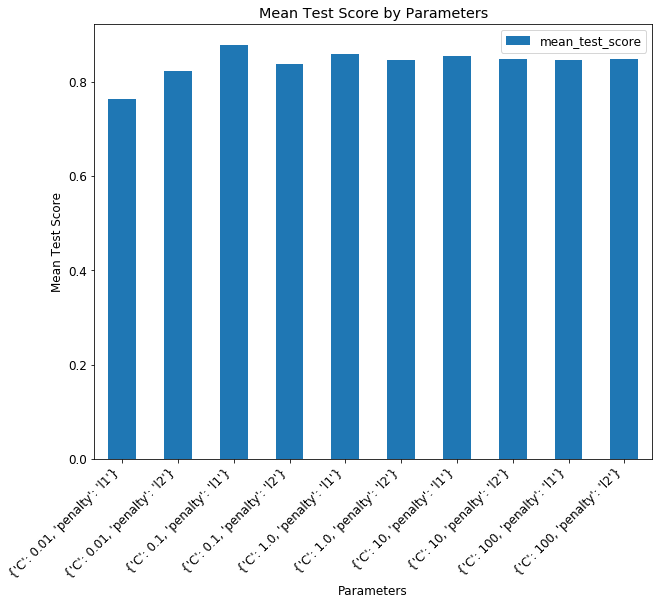

In [36]:
# Create a vertical bar plot by mean test score using matplotlib
# Note: figsize: a tuple (width, height) in inches
ax = results.plot.bar(y='mean_test_score', x='params', figsize=(10, 8));
ax.set_xticklabels(results.params, rotation=45, horizontalalignment='right');
plt.xlabel('Parameters');
plt.ylabel('Mean Test Score');
plt.title('Mean Test Score by Parameters');

In [37]:
print('Best parameter setting found by grid search:')
print(logreg_clf_grid.best_params_)
print()
print('Best mean cross-validated score found by grid search:')
print(round(logreg_clf_grid.best_score_, 3))

Best parameter setting found by grid search:
{'C': 0.1, 'penalty': 'l1'}

Best mean cross-validated score found by grid search:
0.879


#### Prediction using Logistic Regression and Cross-Validation

In [38]:
print('Results Using Logistic Regression and Cross-Validation:')
y_pred_logreg_clf = prediction(X_test, logreg_clf_grid)
cal_accuracy(y_test, y_pred_logreg_clf, logreg_clf_grid)

Results Using Logistic Regression and Cross-Validation:
Predicted values:
[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 1 0 1 0 0 0]

Training accuracy score: 0.8787
Testing accuracy score : 0.8994
Testing accuracy > Training accuracy
-> Not overfitting

Confusion Matrix:
                   Pred Non-Response  Pred Response
True Non-Response                123              1
True Response                     15             20

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       124
           1       0.95      0.57      0.71        35

    accuracy                           0.90       159
   macro avg       0.92      0.78      0.83       159
weighted a

#### Plot Receiver Operating Characteristic (ROC) Curve
https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/

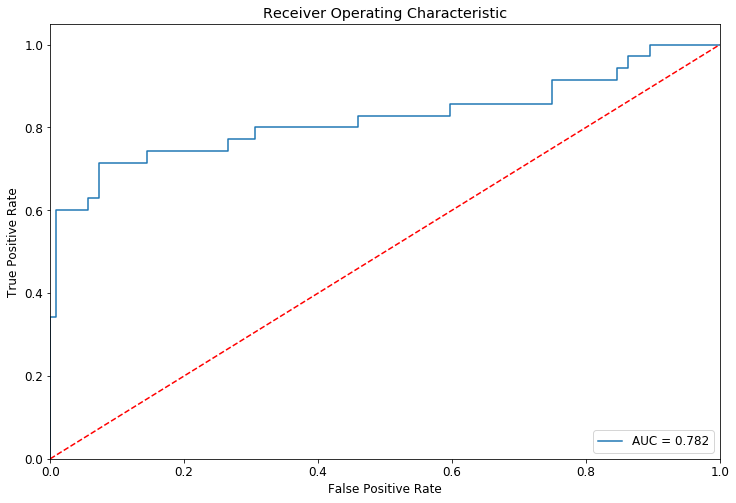

In [39]:
roc_auc = metrics.roc_auc_score(y_test, logreg_clf_grid.predict(X_test))
fpr, tpr, thresholds = metrics.roc_curve(y_test, logreg_clf_grid.predict_proba(X_test)[:, 1])

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.3f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

#### Plot Precision-Recall Curve

In [40]:
# Compute the average precision score
average_precision = metrics.average_precision_score(y_test, logreg_clf_grid.decision_function(X_test))
print('Average precision-recall score: {0:0.3f}'.format(average_precision))

Average precision-recall score: 0.764


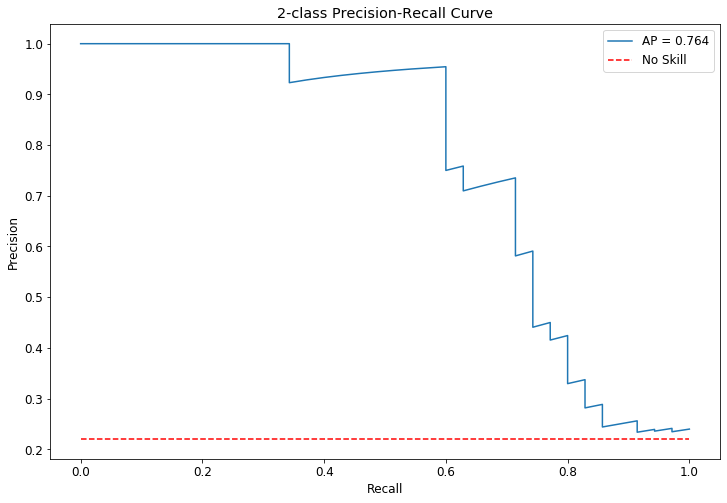

In [41]:
precision, recall, thresholds = metrics.precision_recall_curve(y_test, logreg_clf_grid.decision_function(X_test))
no_skill = len(y_test[y_test==1]) / len(y_test)

plt.title('2-class Precision-Recall Curve')
plt.plot(recall, precision, label='AP = {0:0.3f}'.format(average_precision))
plt.plot([0, 1], [no_skill, no_skill], 'r--', label='No Skill')
plt.legend()
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

### Using Random Forests for Classification

#### Build and train random forest classification models

Note: <br>
- `RandomForestClassifier` does not support missing values for targets.
- Categorical predictor variables must be converted to numeric variables with integer values in order to use `RandomForestClassifier`.

### Building Phase

In [42]:
# Create a list of features
feature_cols = case_study.drop(columns=['response']).columns.values.tolist()

In [43]:
# Create X and y
X = case_study[feature_cols]
y = case_study.response

In [44]:
# Split X and y into training and testing sets
# Note: train_size: between 0.0 and 1.0 and represent the proportion of the dataset to include in the train split
#       test_size: between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split
#       random_state: the seed used by the random number generator
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, test_size=0.30, random_state=65)

#### Compute Baseline Accuracy
https://machinelearningmastery.com/how-to-get-baseline-results-and-why-they-matter/

In [45]:
# Categorical column frequency
# Returns counts of unique values in descending order (first element is the most frequently-occurring element)
# Note: Excludes NA values by default
print(y_train.value_counts())
print()

most_freq_class = y_train.value_counts().index[0]
print('Most frequent class in training dataset:', most_freq_class)
print()

print('Baseline accuracy in test dataset:', round(y_test.value_counts()[most_freq_class] / y_test.count(), 3))

# Instantiate a classifier that makes predictions using simple rules and fit dummy classifier
# Note: stragegy: strategy to use to generate predictions
#       random_state: the seed used by the random number generator
dummy_clf = DummyClassifier(strategy='most_frequent', random_state=0)
dummy_clf.fit(X_train, y_train)
dummy_clf.score(X_test, y_test)
print('Baseline accuracy in test dataset:', round(dummy_clf.score(X_test, y_test), 3))

0    283
1     88
Name: response, dtype: int64

Most frequent class in training dataset: 0

Baseline accuracy in test dataset: 0.78
Baseline accuracy in test dataset: 0.78


Note: Creating train/test as arrays for purpose of running code below: 'Understanding a single decision tree structure from a random forest'. DataFrames do not work for this code.

In [46]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

#### Perform training with Gini Index criteria

In [47]:
# Instantiate a random forest classifier and build a forest of trees from the training set (X, y)
# Note: n_estimators: number of trees in the forest
#       criterion: function to measure the quality of a split; supported criteria are "gini" for the Gini impurity 
#                  and "entropy" for the information gain
#       max_depth: maximum depth of the tree; if None, then nodes are expanded until all leaves are pure or 
#                  until all leaves contain less than min_samples_split samples
#       n_jobs: number of jobs to run in parallel for both `fit` and `predict`; if -1, then the number of jobs is 
#               set to the number of cores
#       random_state: the seed used by the random number generator
rf_gini = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=3, n_jobs=-1, random_state=46)
rf_gini.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=46, verbose=0,
                       warm_start=False)

In [48]:
# Predicted class value for X using random forest classifier
# Note: The predicted class of an input sample is a vote by the trees in the forest, weighted by their probability 
#       estimates. That is, the predicted class is the one with highest mean probability estimate across the trees
#y_pred_class = rf_gini.predict(X_test)
#y_pred_class

In [49]:
# Predicted class probability estimates of the input samples X
# Note: The predicted class probabilities of an input sample are computed as the mean predicted class probabilities
#       of the trees in the forest. The class probability of a single tree is the fraction of samples of the same class in a leaf
#y_pred_prob = rf_gini.predict_proba(X_test)[:, 1]
#y_pred_prob = rf_gini.predict_proba(X_test)
#y_pred_prob

#### Perform training with “entropy” criteria for Information Gain

In [50]:
# Instantiate a random forest classifier and build a forest of trees from the training set (X, y)
# Note: n_estimators: number of trees in the forest
#       criterion: function to measure the quality of a split; supported criteria are "gini" for the Gini impurity 
#                  and "entropy" for the information gain
#       max_depth: maximum depth of the tree; if None, then nodes are expanded until all leaves are pure or 
#                  until all leaves contain less than min_samples_split samples
#       n_jobs: number of jobs to run in parallel for both `fit` and `predict`; if -1, then the number of jobs is 
#               set to the number of cores
#       random_state: the seed used by the random number generator
rf_entropy = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=3, n_jobs=-1, random_state=46)
rf_entropy.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=46, verbose=0,
                       warm_start=False)

In [51]:
# Predicted class value for X using random forest classifier
# Note: The predicted class of an input sample is a vote by the trees in the forest, weighted by their probability 
#       estimates. That is, the predicted class is the one with highest mean probability estimate across the trees
#y_pred_class = rf_entropy.predict(X_test)
#y_pred_class

In [52]:
# Predicted class probability estimates of the input samples X
# Note: The predicted class probabilities of an input sample are computed as the mean predicted class probabilities
#       of the trees in the forest. The class probability of a single tree is the fraction of samples of the same class in a leaf
#y_pred_prob = rf_entropy.predict_proba(X_test)[:, 1]
#y_pred_prob = rf_entropy.predict_proba(X_test)
#y_pred_prob

### Operational Phase

#### Prediction using Random Forest Gini Index Criteria

In [53]:
print('Results Using Random Forest Gini Index Criteria:')
y_pred_gini = prediction(X_test, rf_gini)
cal_accuracy(y_test, y_pred_gini, rf_gini)

Results Using Random Forest Gini Index Criteria:
Predicted values:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0]

Training accuracy score: 0.8032
Testing accuracy score : 0.7862
Testing accuracy < Training accuracy
-> Overfitting!

Confusion Matrix:
                   Pred Non-Response  Pred Response
True Non-Response                124              0
True Response                     34              1

Classification Report:
              precision    recall  f1-score   support

           0       0.78      1.00      0.88       124
           1       1.00      0.03      0.06        35

    accuracy                           0.79       159
   macro avg       0.89      0.51      0.47       159
weighted avg       0

#### Prediction using Random Forest Entropy Criteria

In [54]:
print('Results Using Random Forest Entropy Criteria:')
y_pred_entropy = prediction(X_test, rf_entropy)
cal_accuracy(y_test, y_pred_entropy, rf_entropy)

Results Using Random Forest Entropy Criteria:
Predicted values:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0]

Training accuracy score: 0.8032
Testing accuracy score : 0.7799
Testing accuracy < Training accuracy
-> Overfitting!

Confusion Matrix:
                   Pred Non-Response  Pred Response
True Non-Response                124              0
True Response                     35              0

Classification Report:
              precision    recall  f1-score   support

           0       0.78      1.00      0.88       124
           1       0.00      0.00      0.00        35

    accuracy                           0.78       159
   macro avg       0.39      0.50      0.44       159
weighted avg       0.61

/Users/yangweichle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Optimize model using grid-search with cross-validation

[Hyperparameter Tuning the Random Forest in Python](https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74)

In [55]:
# Create the parameter grid
parameters = {'n_estimators': [30, 50, 100],
              'criterion': ['gini', 'entropy'],
              'max_depth': [2, 3, 4]}

pprint(parameters)

{'criterion': ['gini', 'entropy'],
 'max_depth': [2, 3, 4],
 'n_estimators': [30, 50, 100]}


In [56]:
# Instantiate a random forest classifier
# Note: random_state: the seed used by the random number generator
rf = RandomForestClassifier(random_state=46)

In [57]:
# Instantiate an exhaustive search over specified parameter values for an estimator and fit with all sets of parameters
# Note: estimator: estimator object
#       param_grid: dictionary with parameters names (string) as keys and lists of parameter settings to try as values; 
#                   this enables searching over any sequence of parameter settings
#       n_jobs: number of jobs to run in parallel; if -1, then the number of jobs is set to the number of cores
#       cv: number of folds in k-fold cross-validation
#       return_train_score: if False, the cv_results_ attribute will not include training scores
rf_clf_grid = GridSearchCV(estimator=rf, param_grid=parameters, n_jobs=-1, cv=10, return_train_score=True)
rf_clf_grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=46,
                                 

In [58]:
results = pd.DataFrame.from_dict(rf_clf_grid.cv_results_)
pd.DataFrame.from_dict(rf_clf_grid.cv_results_, orient='index')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
mean_fit_time,0.5350252151489258,0.8265923976898193,1.3394531965255738,0.7183027744293213,0.7661449670791626,0.9901010990142822,0.5052194833755493,0.6389873027801514,1.0216649532318116,0.40546910762786864,0.5486717224121094,0.7063392400741577,0.5196598291397094,0.986853837966919,1.055221724510193,0.6230975389480591,0.9705510139465332,1.3822220087051391
std_fit_time,0.02036385221409013,0.07804347929045236,0.10219762171190895,0.04637229423014804,0.05135968519634203,0.06194149485355229,0.04235612107538139,0.03752803595734771,0.022896951131440246,0.06521553986128772,0.03419208425050851,0.012195657456454068,0.10529382653348102,0.05161294608837465,0.12182280038743822,0.11883884770141954,0.027051799400462668,0.18133170544447905
mean_score_time,0.01660618782043457,0.020618629455566407,0.03099524974822998,0.022413039207458497,0.030498600006103514,0.03464319705963135,0.011939644813537598,0.018040680885314943,0.030008959770202636,0.012895560264587403,0.015075969696044921,0.027010178565979003,0.020835351943969727,0.03985145092010498,0.044857573509216306,0.020837044715881346,0.03692913055419922,0.02752101421356201
std_score_time,0.007820174895421682,0.01387803571956937,0.01138822887168806,0.015678124175264416,0.007667723691938202,0.00531806784684156,0.0023707831759935327,0.004515100079395214,0.006383436255313539,0.0027601437964908035,0.004309210054542526,0.004226420516244991,0.007905277577345686,0.01788584600340225,0.023918109783547893,0.009301008397420658,0.012216122481034484,0.005846447456956871
param_criterion,gini,gini,gini,gini,gini,gini,gini,gini,gini,entropy,entropy,entropy,entropy,entropy,entropy,entropy,entropy,entropy
param_max_depth,2,2,2,3,3,3,4,4,4,2,2,2,3,3,3,4,4,4
param_n_estimators,30,50,100,30,50,100,30,50,100,30,50,100,30,50,100,30,50,100
params,"{'criterion': 'gini', 'max_depth': 2, 'n_estim...","{'criterion': 'gini', 'max_depth': 2, 'n_estim...","{'criterion': 'gini', 'max_depth': 2, 'n_estim...","{'criterion': 'gini', 'max_depth': 3, 'n_estim...","{'criterion': 'gini', 'max_depth': 3, 'n_estim...","{'criterion': 'gini', 'max_depth': 3, 'n_estim...","{'criterion': 'gini', 'max_depth': 4, 'n_estim...","{'criterion': 'gini', 'max_depth': 4, 'n_estim...","{'criterion': 'gini', 'max_depth': 4, 'n_estim...","{'criterion': 'entropy', 'max_depth': 2, 'n_es...","{'criterion': 'entropy', 'max_depth': 2, 'n_es...","{'criterion': 'entropy', 'max_depth': 2, 'n_es...","{'criterion': 'entropy', 'max_depth': 3, 'n_es...","{'criterion': 'entropy', 'max_depth': 3, 'n_es...","{'criterion': 'entropy', 'max_depth': 3, 'n_es...","{'criterion': 'entropy', 'max_depth': 4, 'n_es...","{'criterion': 'entropy', 'max_depth': 4, 'n_es...","{'criterion': 'entropy', 'max_depth': 4, 'n_es..."
split0_test_score,0.7631578947368421,0.7631578947368421,0.7631578947368421,0.7631578947368421,0.7631578947368421,0.7631578947368421,0.7631578947368421,0.7631578947368421,0.7631578947368421,0.7631578947368421,0.7631578947368421,0.7631578947368421,0.7631578947368421,0.7631578947368421,0.7631578947368421,0.7631578947368421,0.7631578947368421,0.7631578947368421
split1_test_score,0.7837837837837838,0.7837837837837838,0.7837837837837838,0.7837837837837838,0.7837837837837838,0.7837837837837838,0.7837837837837838,0.7837837837837838,0.7837837837837838,0.7837837837837838,0.7837837837837838,0.7837837837837838,0.7837837837837838,0.7837837837837838,0.7837837837837838,0.7837837837837838,0.7837837837837838,0.7837837837837838


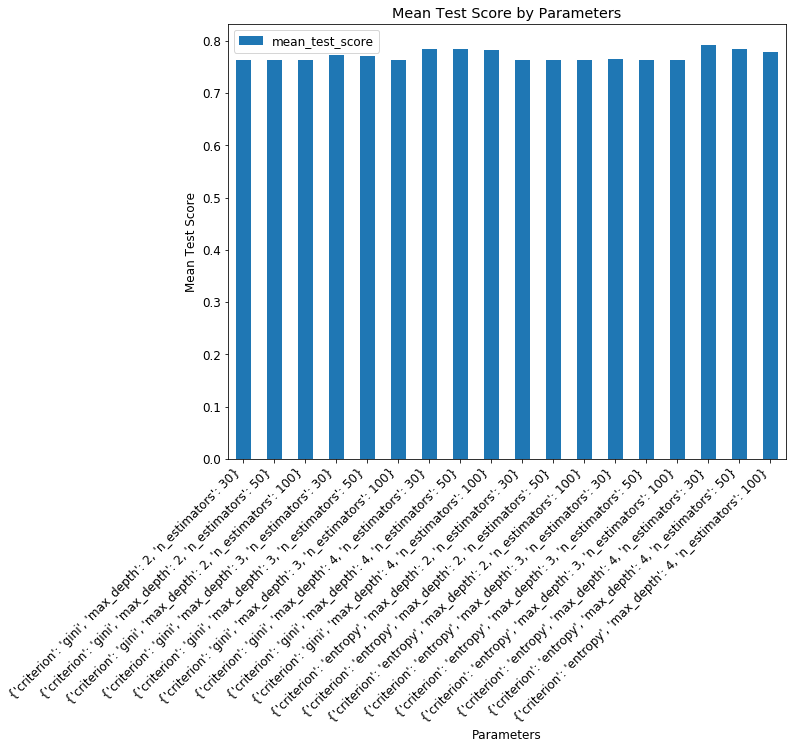

In [59]:
# Create a vertical bar plot by mean test score using matplotlib
# Note: figsize: a tuple (width, height) in inches
ax = results.plot.bar(y='mean_test_score', x='params', figsize=(10, 8));
ax.set_xticklabels(results.params, rotation=45, horizontalalignment='right');
plt.xlabel('Parameters');
plt.ylabel('Mean Test Score');
plt.title('Mean Test Score by Parameters');

In [60]:
print('Best parameter setting found by grid search:')
print(rf_clf_grid.best_params_)
print()
print('Best mean cross-validated score found by grid search:')
print(round(rf_clf_grid.best_score_, 3))

Best parameter setting found by grid search:
{'criterion': 'entropy', 'max_depth': 4, 'n_estimators': 30}

Best mean cross-validated score found by grid search:
0.793


#### Prediction using Random Forest and Cross-Validation

In [61]:
print('Results Using Random Forest and Cross-Validation:')
y_pred_rf_clf_grid = prediction(X_test, rf_clf_grid)
cal_accuracy(y_test, y_pred_rf_clf_grid, rf_clf_grid)

Results Using Random Forest and Cross-Validation:
Predicted values:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0]

Training accuracy score: 0.8437
Testing accuracy score : 0.805
Testing accuracy < Training accuracy
-> Overfitting!

Confusion Matrix:
                   Pred Non-Response  Pred Response
True Non-Response                124              0
True Response                     31              4

Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89       124
           1       1.00      0.11      0.21        35

    accuracy                           0.81       159
   macro avg       0.90      0.56      0.55       159
weighted avg       0

#### Plot Receiver Operating Characteristic (ROC) Curve
https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/

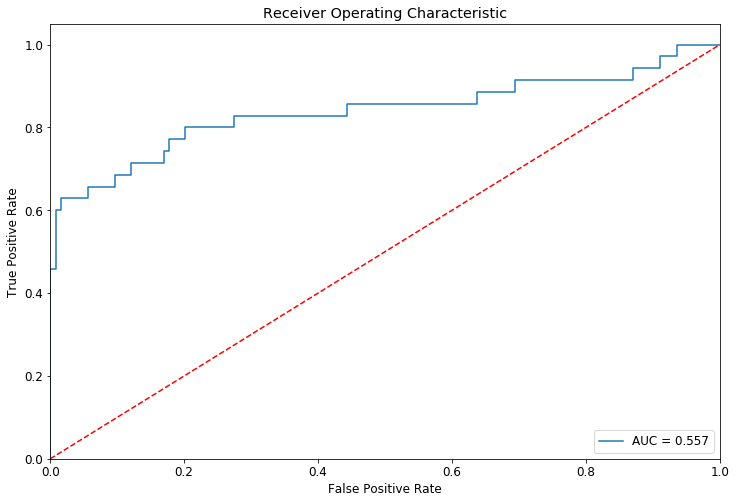

In [62]:
roc_auc = metrics.roc_auc_score(y_test, rf_clf_grid.predict(X_test))
fpr, tpr, thresholds = metrics.roc_curve(y_test, rf_clf_grid.predict_proba(X_test)[:, 1])

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.3f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

#### Plot Precision-Recall Curve

In [63]:
# Compute the average precision score
average_precision = metrics.average_precision_score(y_test, rf_clf_grid.predict_proba(X_test)[:, 1])
print('Average precision-recall score: {0:0.3f}'.format(average_precision))

Average precision-recall score: 0.783


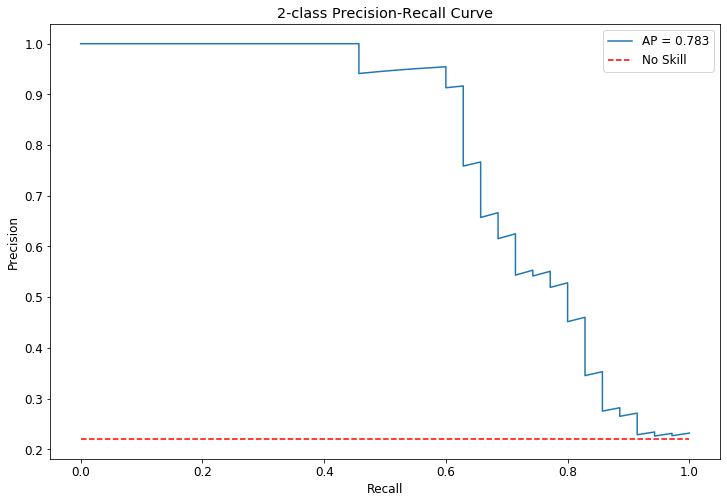

In [64]:
precision, recall, thresholds = metrics.precision_recall_curve(y_test, rf_clf_grid.predict_proba(X_test)[:, 1])
no_skill = len(y_test[y_test==1]) / len(y_test)

plt.title('2-class Precision-Recall Curve')
plt.plot(recall, precision, label='AP = {0:0.3f}'.format(average_precision))
plt.plot([0, 1], [no_skill, no_skill], 'r--', label='No Skill')
plt.legend()
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

### Using Support Vector Machines for Classification

#### Build and train support vector classification models

### Building Phase

In [65]:
# Create a list of features
feature_cols = case_study.drop(columns=['response']).columns.values.tolist()

In [66]:
# Create X and y
X = case_study[feature_cols]
y = case_study.response

In [67]:
# Split X and y into training and testing sets
# Note: train_size: between 0.0 and 1.0 and represent the proportion of the dataset to include in the train split
#       test_size: between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split
#       random_state: the seed used by the random number generator
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, test_size=0.30, random_state=65)

#### Compute Baseline Accuracy
https://machinelearningmastery.com/how-to-get-baseline-results-and-why-they-matter/

In [68]:
# Categorical column frequency
# Returns counts of unique values in descending order (first element is the most frequently-occurring element)
# Note: Excludes NA values by default
print(y_train.value_counts())
print()

most_freq_class = y_train.value_counts().index[0]
print('Most frequent class in training dataset:', most_freq_class)
print()

print('Baseline accuracy in test dataset:', round(y_test.value_counts()[most_freq_class] / y_test.count(), 3))

# Instantiate a classifier that makes predictions using simple rules and fit dummy classifier
# Note: stragegy: strategy to use to generate predictions
#       random_state: the seed used by the random number generator
dummy_clf = DummyClassifier(strategy='most_frequent', random_state=0)
dummy_clf.fit(X_train, y_train)
dummy_clf.score(X_test, y_test)
print('Baseline accuracy in test dataset:', round(dummy_clf.score(X_test, y_test), 3))

0    283
1     88
Name: response, dtype: int64

Most frequent class in training dataset: 0

Baseline accuracy in test dataset: 0.78
Baseline accuracy in test dataset: 0.78


In [69]:
print('Length of X_train: {}'.format(len(X_train)))
print('Length of y_train: {}'.format(len(y_train)))
print('Length of X_test: {}'.format(len(X_test)))
print('Length of y_test: {}'.format(len(y_test)))

Length of X_train: 371
Length of y_train: 371
Length of X_test: 159
Length of y_test: 159


In [70]:
# Instantiate a C-Support Vector classifier and fit SVC model
# Note: C: penalty parameter C of the error term (default=1.0)
#       kernel: Specifies the kernel type to be used in the algorithm; it must be one of 'linear', 'poly',
#               'rbf' (default), 'sigmoid', 'precomputed' or a callable
#       gamma: kernel coefficient for 'rbf', 'poly' and 'sigmoid' (float, optional) (default='auto');
#              if gamma is 'auto' then 1/n_features will be used instead
#       random_state: the seed used by the random number generator
svc_clf = SVC(C=1.0, kernel='linear', gamma='auto', random_state=46)
svc_clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=46, shrinking=True, tol=0.001,
    verbose=False)

In [71]:
# Predict the class labels using the SVC model
y_pred_class = svc_clf.predict(X_test)

#### Get the coefficient for each feature

In [72]:
name = X.columns
coef = np.round(svc_clf.coef_[0], 4)
#pd.DataFrame([name, coef], index=['Name', 'Coefficient']).transpose()

### Operational Phase

#### Prediction using SVC

In [73]:
print('Results Using SVC:')
y_pred_svc_clf = prediction(X_test, svc_clf)
cal_accuracy(y_test, y_pred_svc_clf, svc_clf)

Results Using SVC:
Predicted values:
[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0
 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 0 0]

Training accuracy score: 1.0
Testing accuracy score : 0.8805
Testing accuracy < Training accuracy
-> Overfitting!

Confusion Matrix:
                   Pred Non-Response  Pred Response
True Non-Response                120              4
True Response                     15             20

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       124
           1       0.83      0.57      0.68        35

    accuracy                           0.88       159
   macro avg       0.86      0.77      0.80       159
weighted avg       0.88      0.88      0.87       159

#### Optimize model using grid-search with cross-validation

In [74]:
# Create the parameter grid
parameters = {'kernel': ['rbf', 'linear'],
              'C': [0.01, 0.1, 1.0, 10, 100]}

pprint(parameters)

{'C': [0.01, 0.1, 1.0, 10, 100], 'kernel': ['rbf', 'linear']}


In [75]:
# Instantiate a C-Support Vector classifier and fit SVC model
# Note: C: penalty parameter C of the error term (default=1.0)
#       kernel: Specifies the kernel type to be used in the algorithm; it must be one of 'linear', 'poly',
#               'rbf' (default), 'sigmoid', 'precomputed' or a callable
#       gamma: kernel coefficient for 'rbf', 'poly' and 'sigmoid' (float, optional) (default='auto');
#              if gamma is 'auto' then 1/n_features will be used instead
#       random_state: the seed used by the random number generator
svc_clf = SVC(gamma='auto', random_state=46)
svc_clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=46, shrinking=True, tol=0.001,
    verbose=False)

In [76]:
# Instantiate an exhaustive search over specified parameter values for an estimator and run fit with all sets of parameters
# Note: estimator: estimator object
#       param_grid: dictionary with parameters names (string) as keys and lists of parameter settings to try as values; 
#                   this enables searching over any sequence of parameter settings
#       cv: number of folds in k-fold cross-validation
#       return_train_score: if False, the cv_results_ attribute will not include training scores
svc_clf_grid = GridSearchCV(estimator=svc_clf, param_grid=parameters, cv=10, return_train_score=True)
svc_clf_grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto', kernel='rbf', max_iter=-1,
                           probability=False, random_state=46, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1.0, 10, 100],
                         'kernel': ['rbf', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [77]:
results = pd.DataFrame.from_dict(svc_clf_grid.cv_results_)
pd.DataFrame.from_dict(svc_clf_grid.cv_results_, orient='index')

,0,1,2,3,4,5,6,7,8,9
mean_fit_time,1.1637089014053346,2.240521454811096,1.4985071182250977,2.041958713531494,1.6280972480773925,2.1980157136917113,1.7197962760925294,2.184785842895508,2.3851961851119996,2.19439377784729
std_fit_time,0.11766029259114368,0.17346020848292273,0.09975032262912488,0.12188764679702166,0.12187140781744939,0.19906411218051928,0.13424676074919834,0.27285461784149767,0.2865663844752564,0.24456425171562837
mean_score_time,0.1273650884628296,0.2193282127380371,0.16821572780609131,0.19222416877746581,0.18845047950744628,0.20765926837921142,0.20663251876831054,0.21789488792419434,0.24602189064025878,0.21222996711730957
std_score_time,0.017371495167168925,0.032046454791748294,0.019331727027349678,0.006334026858631822,0.027223255886572987,0.027032959622794964,0.03986923544589998,0.03673801936931081,0.04136268028240715,0.022534690387481057
param_C,0.01,0.01,0.1,0.1,1.0,1.0,10,10,100,100
param_kernel,rbf,linear,rbf,linear,rbf,linear,rbf,linear,rbf,linear
params,"{'C': 0.01, 'kernel': 'rbf'}","{'C': 0.01, 'kernel': 'linear'}","{'C': 0.1, 'kernel': 'rbf'}","{'C': 0.1, 'kernel': 'linear'}","{'C': 1.0, 'kernel': 'rbf'}","{'C': 1.0, 'kernel': 'linear'}","{'C': 10, 'kernel': 'rbf'}","{'C': 10, 'kernel': 'linear'}","{'C': 100, 'kernel': 'rbf'}","{'C': 100, 'kernel': 'linear'}"
split0_test_score,0.7631578947368421,0.9210526315789473,0.7631578947368421,0.9210526315789473,0.7631578947368421,0.9210526315789473,0.868421052631579,0.9210526315789473,0.9210526315789473,0.9210526315789473
split1_test_score,0.7837837837837838,0.8648648648648649,0.7837837837837838,0.8648648648648649,0.7837837837837838,0.8648648648648649,0.8108108108108109,0.8648648648648649,0.8648648648648649,0.8648648648648649
split2_test_score,0.7837837837837838,0.8648648648648649,0.7837837837837838,0.8648648648648649,0.7837837837837838,0.8648648648648649,0.8378378378378378,0.8648648648648649,0.8648648648648649,0.8648648648648649


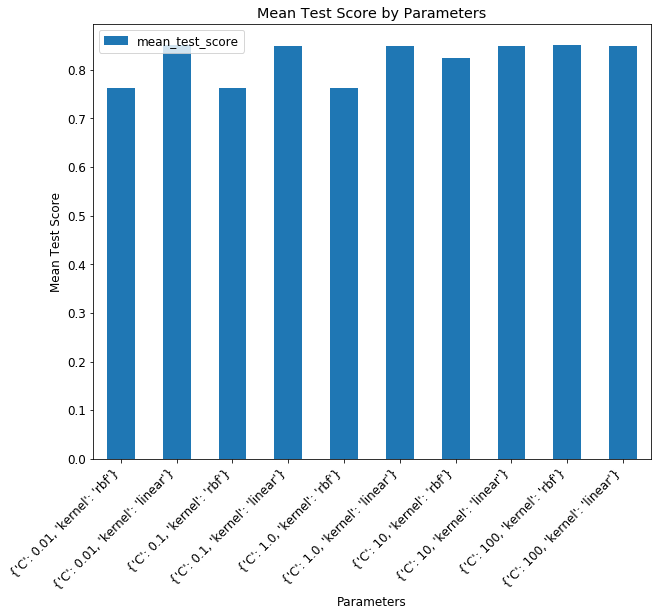

In [78]:
# Create a vertical bar plot by mean test score using matplotlib
# Note: figsize: a tuple (width, height) in inches
ax = results.plot.bar(y='mean_test_score', x='params', figsize=(10, 8));
ax.set_xticklabels(results.params, rotation=45, horizontalalignment='right');
plt.xlabel('Parameters');
plt.ylabel('Mean Test Score');
plt.title('Mean Test Score by Parameters');

In [79]:
print('Best parameter setting found by grid search:')
print(svc_clf_grid.best_params_)
print()
print('Best mean cross-validated score found by grid search:')
print(round(svc_clf_grid.best_score_, 3))

Best parameter setting found by grid search:
{'C': 0.01, 'kernel': 'linear'}

Best mean cross-validated score found by grid search:
0.852


#### Prediction using SVC and Cross-Validation

In [80]:
print('Results Using Linear SVC and Cross-Validation:')
y_pred_svc_clf_grid = prediction(X_test, svc_clf_grid)
cal_accuracy(y_test, y_pred_svc_clf_grid, svc_clf_grid)

Results Using Linear SVC and Cross-Validation:
Predicted values:
[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0
 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 0 0]

Training accuracy score: 1.0
Testing accuracy score : 0.8805
Testing accuracy < Training accuracy
-> Overfitting!

Confusion Matrix:
                   Pred Non-Response  Pred Response
True Non-Response                120              4
True Response                     15             20

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       124
           1       0.83      0.57      0.68        35

    accuracy                           0.88       159
   macro avg       0.86      0.77      0.80       159
weighted avg       0.88  

#### Plot Receiver Operating Characteristic (ROC) Curve
https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/

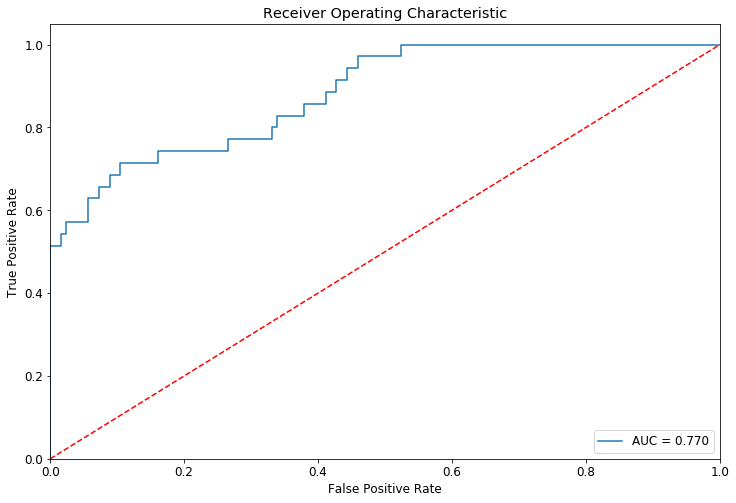

In [81]:
roc_auc = metrics.roc_auc_score(y_test, svc_clf_grid.predict(X_test))
fpr, tpr, thresholds = metrics.roc_curve(y_test, svc_clf_grid.decision_function(X_test))

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.3f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

#### Plot Precision-Recall Curve

In [82]:
# Compute the average precision score
average_precision = metrics.average_precision_score(y_test, svc_clf_grid.decision_function(X_test))
print('Average precision-recall score: {0:0.3f}'.format(average_precision))

Average precision-recall score: 0.783


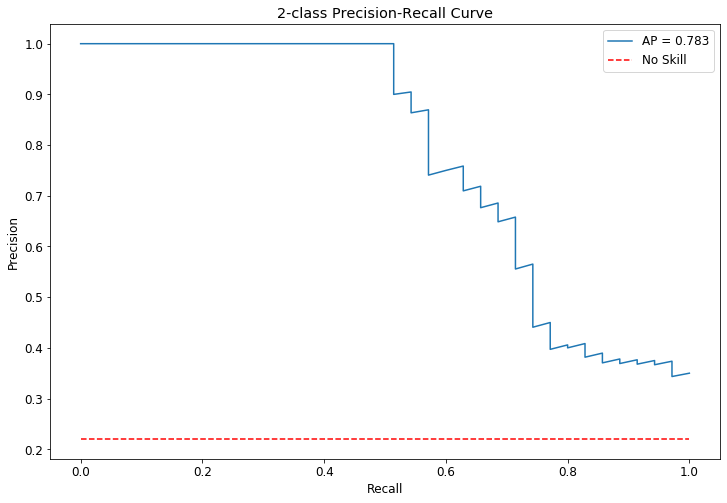

In [83]:
precision, recall, thresholds = metrics.precision_recall_curve(y_test, svc_clf_grid.decision_function(X_test))
no_skill = len(y_test[y_test==1]) / len(y_test)

plt.title('2-class Precision-Recall Curve')
plt.plot(recall, precision, label='AP = {0:0.3f}'.format(average_precision))
plt.plot([0, 1], [no_skill, no_skill], 'r--', label='No Skill')
plt.legend()
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()